<a href="https://colab.research.google.com/github/malodept/breast-cancer-detection/blob/main/breast_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A partir de 30 caractéristiques liées à une tumeur trouvée au sein, on essaie de prédire si la tumeur est bénigne ou maligne.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import mutual_info_score


from sklearn.linear_model import LogisticRegression

On load le dataset

In [ ]:
df=pd.read_csv('/breast-cancer-wisconsin-data.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#id ne nous servira pas -> on supprime la colonne
df.drop('id', axis=1,inplace=True)


In [ ]:
#y a-t-il des lignes identiques ?
df.duplicated().sum()
#non

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
num=df.select_dtypes(include=['int64','float64']).columns
num

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
num=df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

num.describe()
len(num)

569

In [ ]:
cat=df.select_dtypes(include=['object']).columns
cat
#pareil pour les variables catégoriques, il n'y a que diagnosis

Index(['diagnosis'], dtype='object')

In [ ]:
num.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


On va essayer de se représenter la corrélation entre chaque caractéristique et si la tumeur est M ou B.

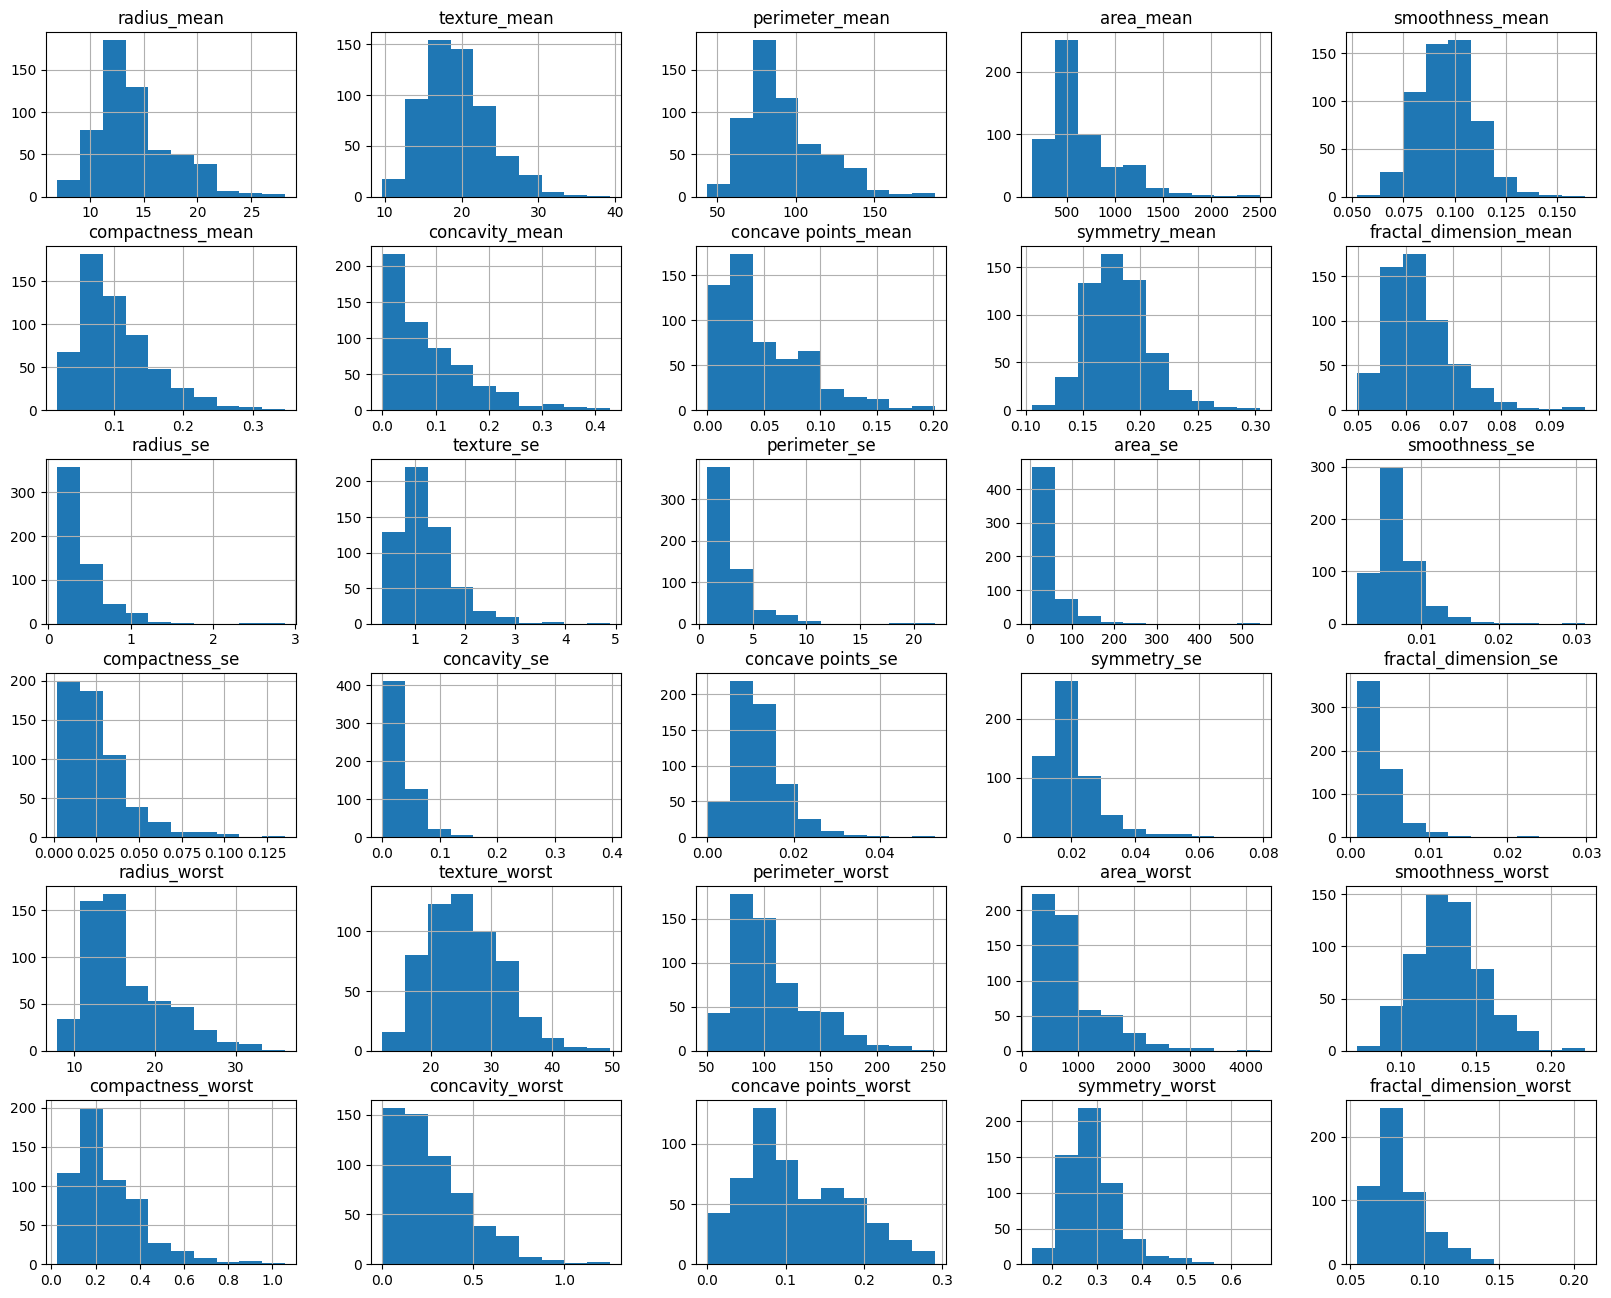

In [ ]:
#Déjà, à quoi ressemblent les distributions ?
num.hist(figsize=(20,16))

plt.show()

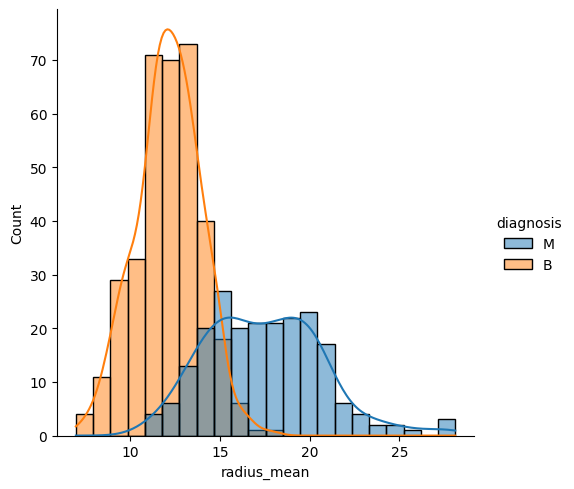

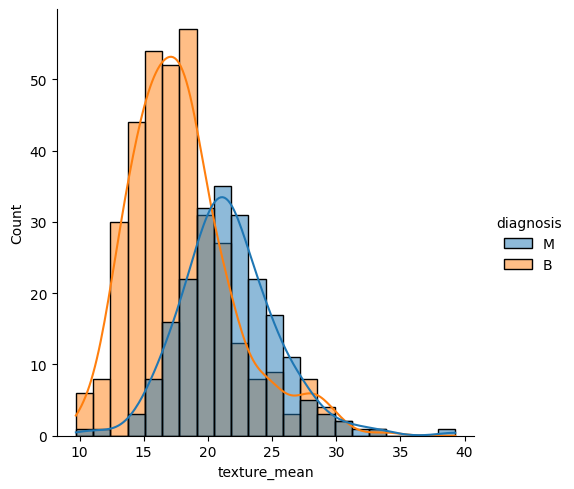

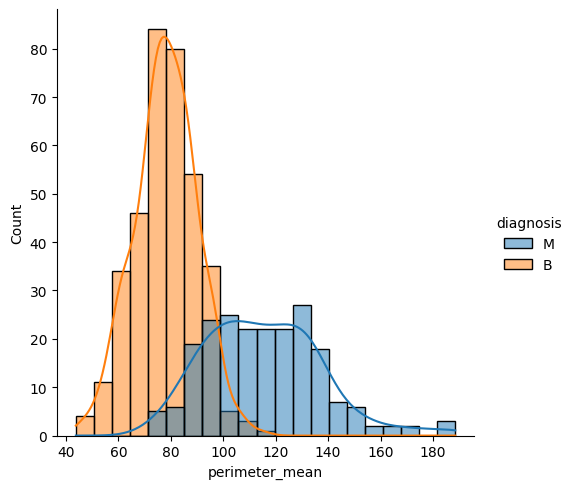

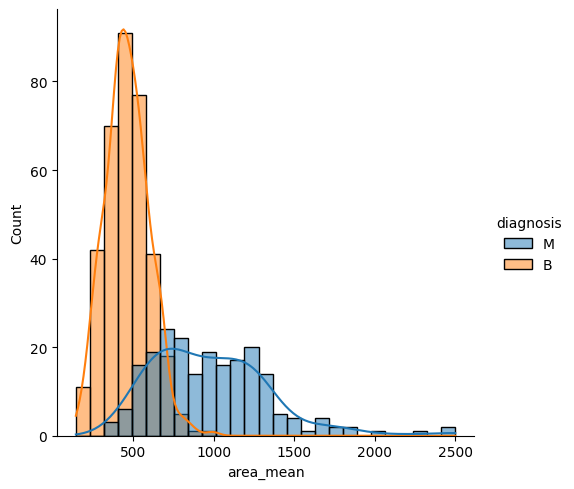

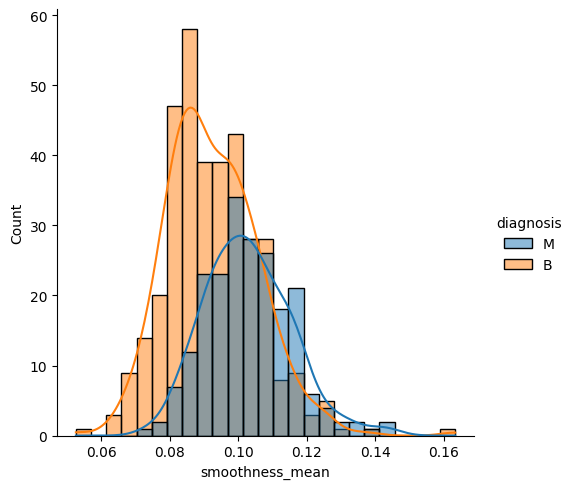

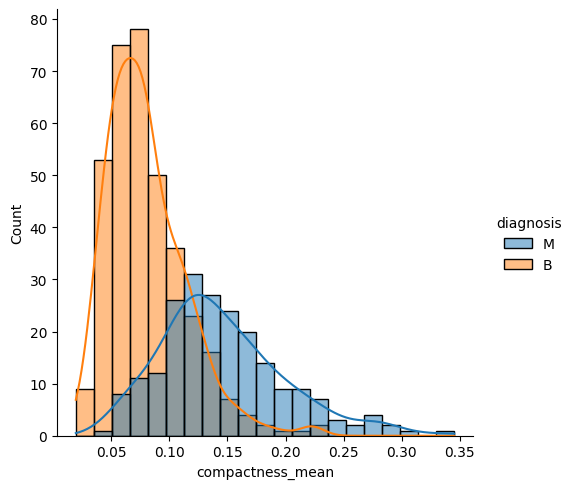

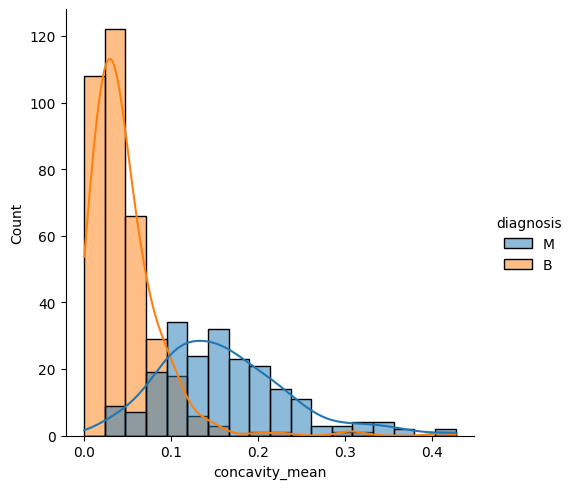

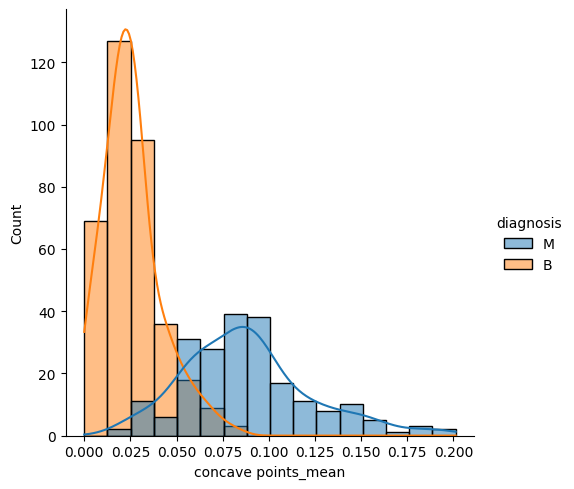

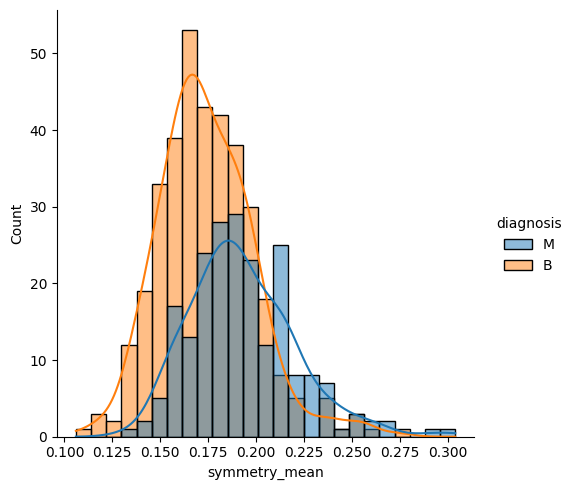

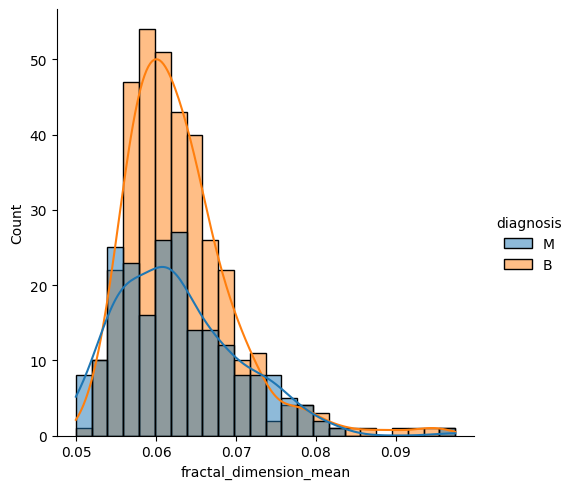

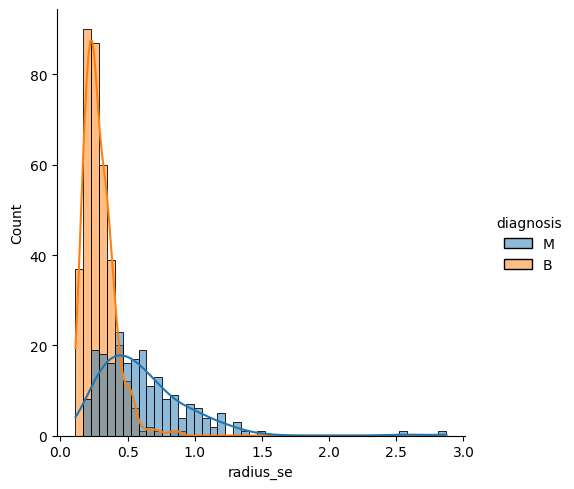

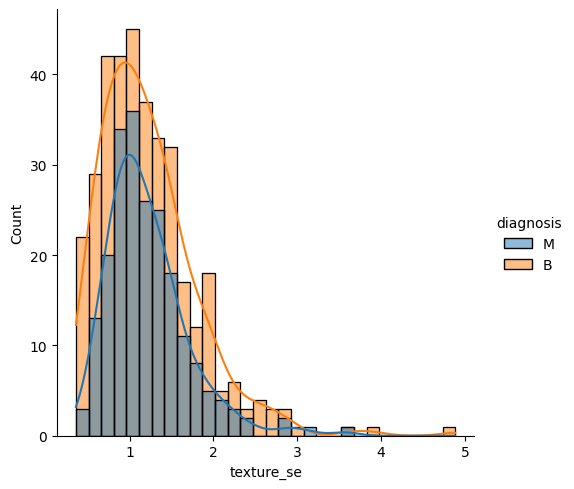

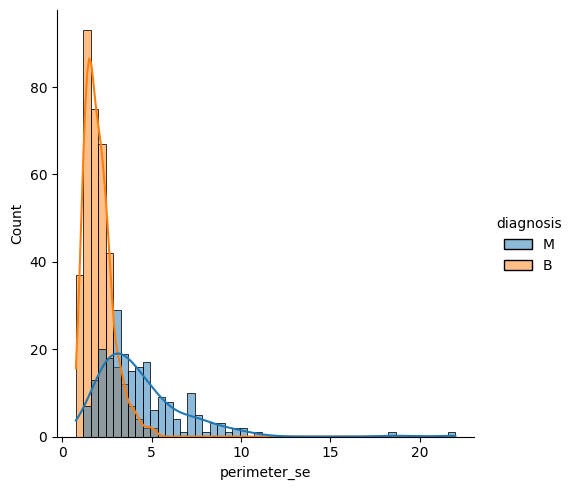

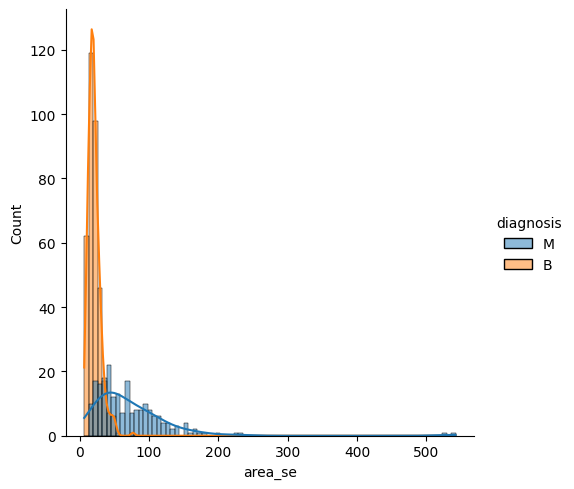

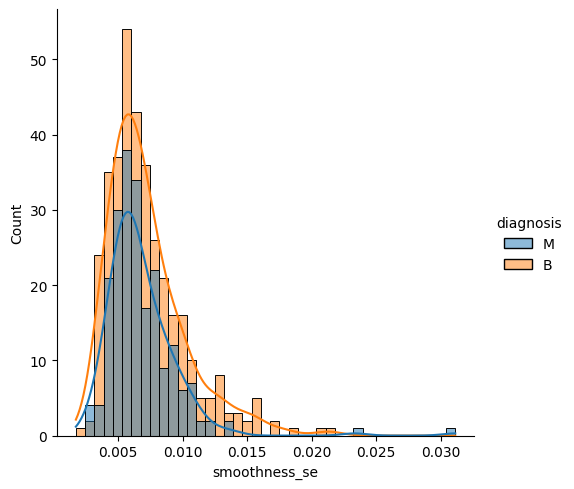

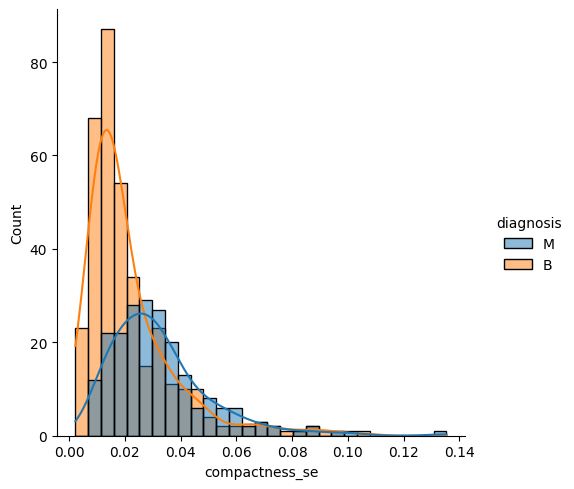

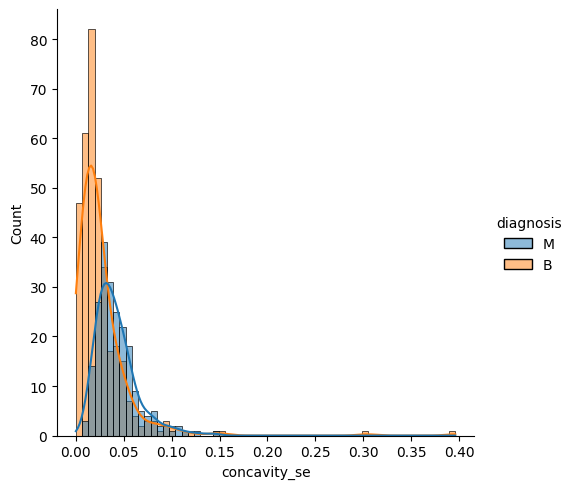

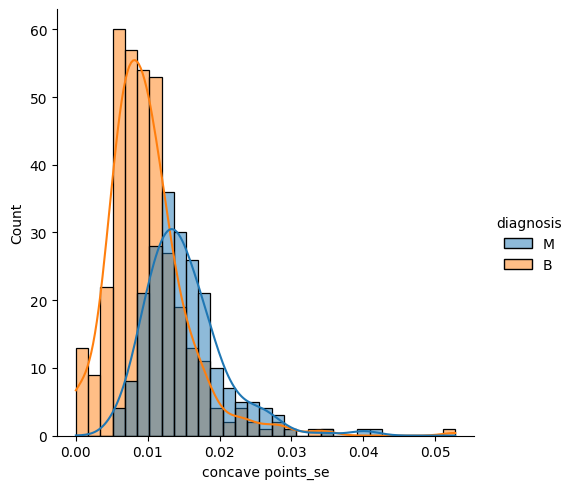

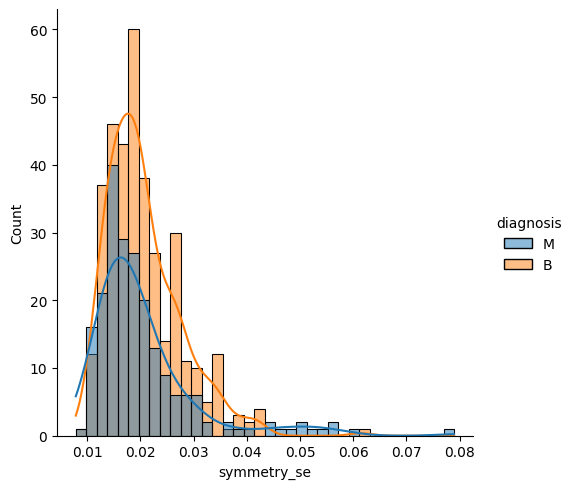

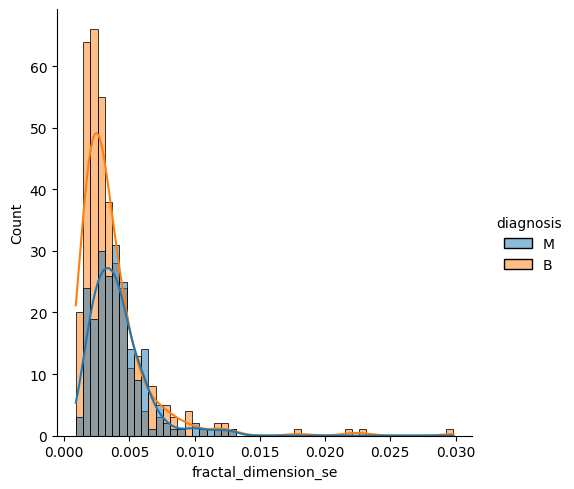

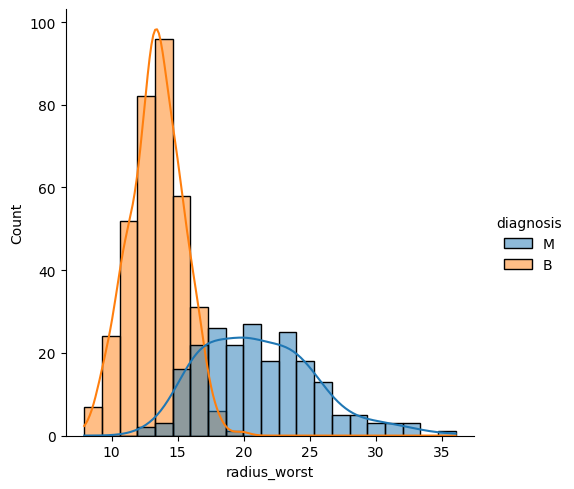

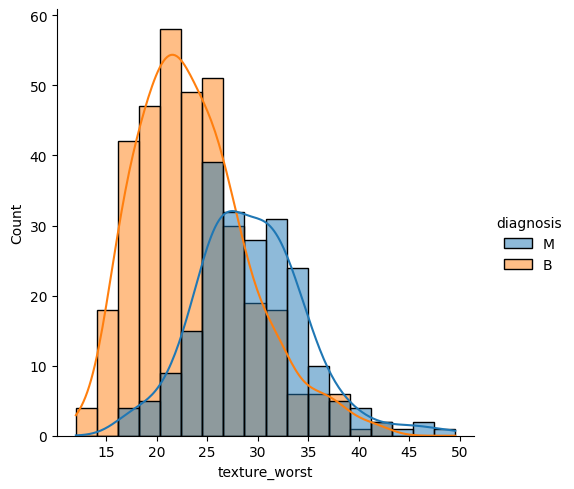

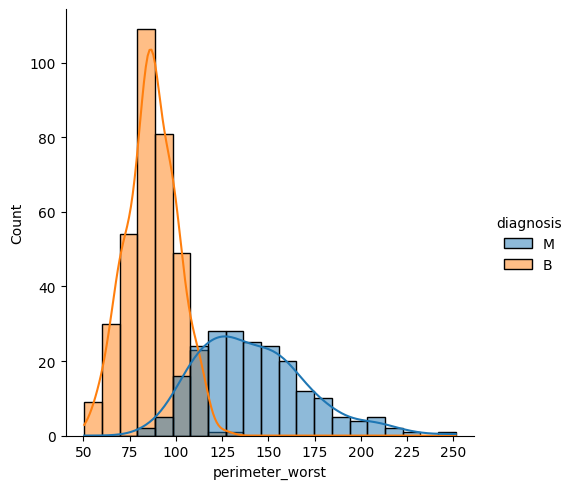

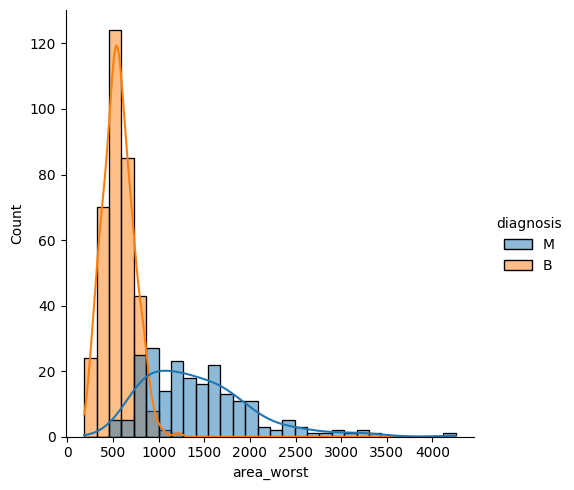

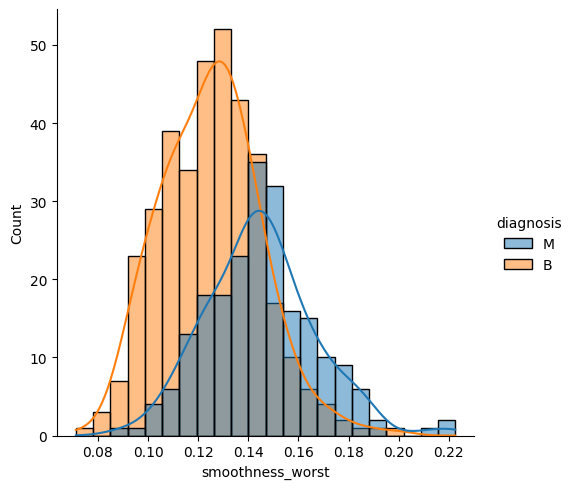

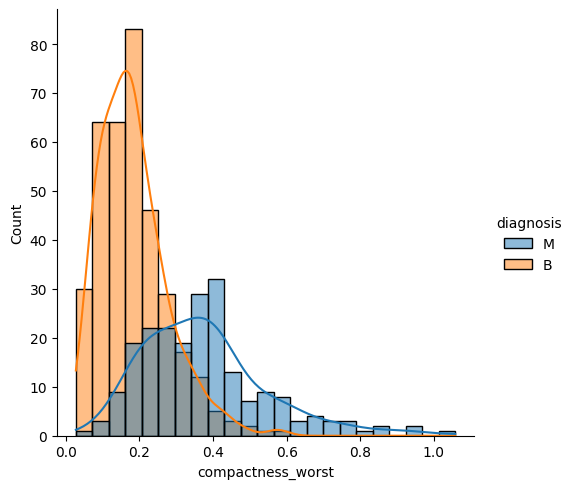

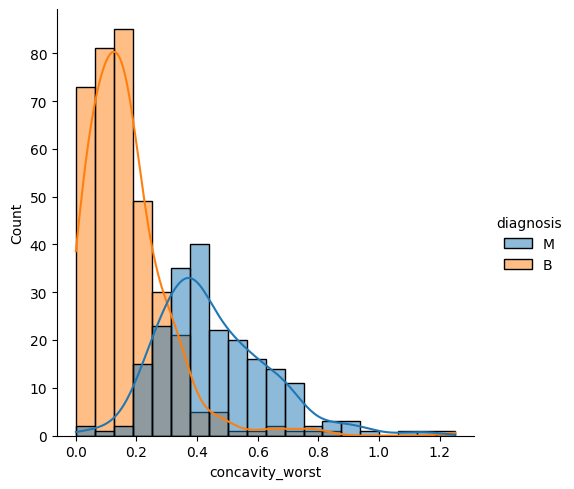

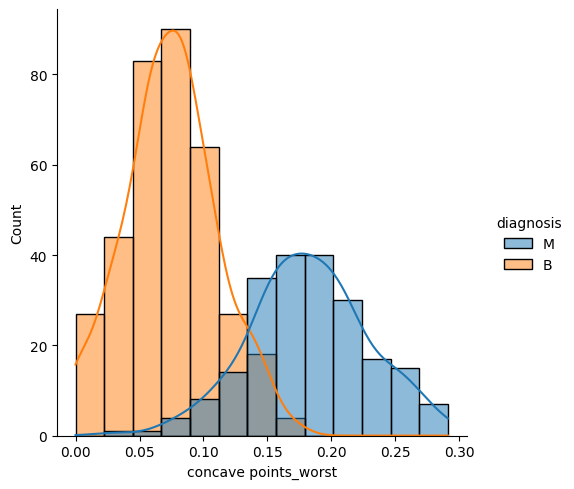

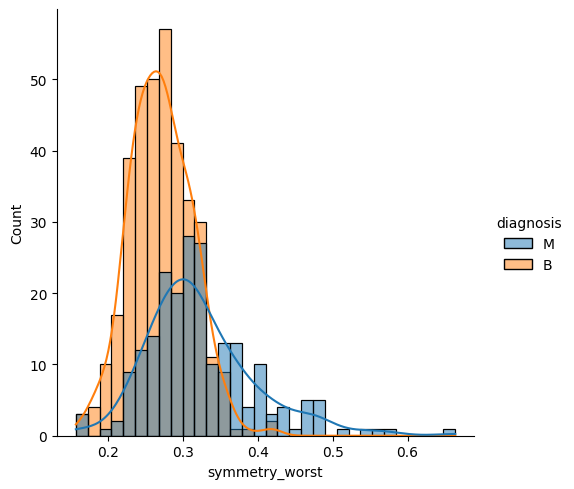

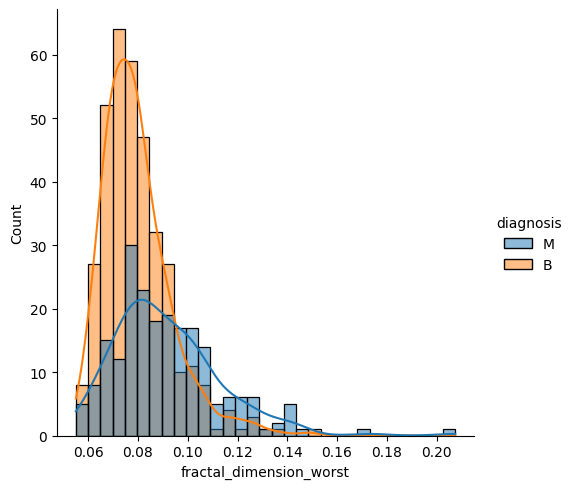

In [ ]:
for n in num:
    sn.displot(data=df, x=n, hue='diagnosis', kind='hist', kde=True)
    plt.show()

On va label-encode la variable catégorique Diagnosis (la seule catégorique)

In [ ]:
lb=LabelEncoder()
df['diagnosis']=lb.fit_transform(df['diagnosis'])
df['diagnosis'].value_counts()


0    357
1    212
Name: diagnosis, dtype: int64

<Axes: title={'center': 'Correlated with Diagnosis_M'}>

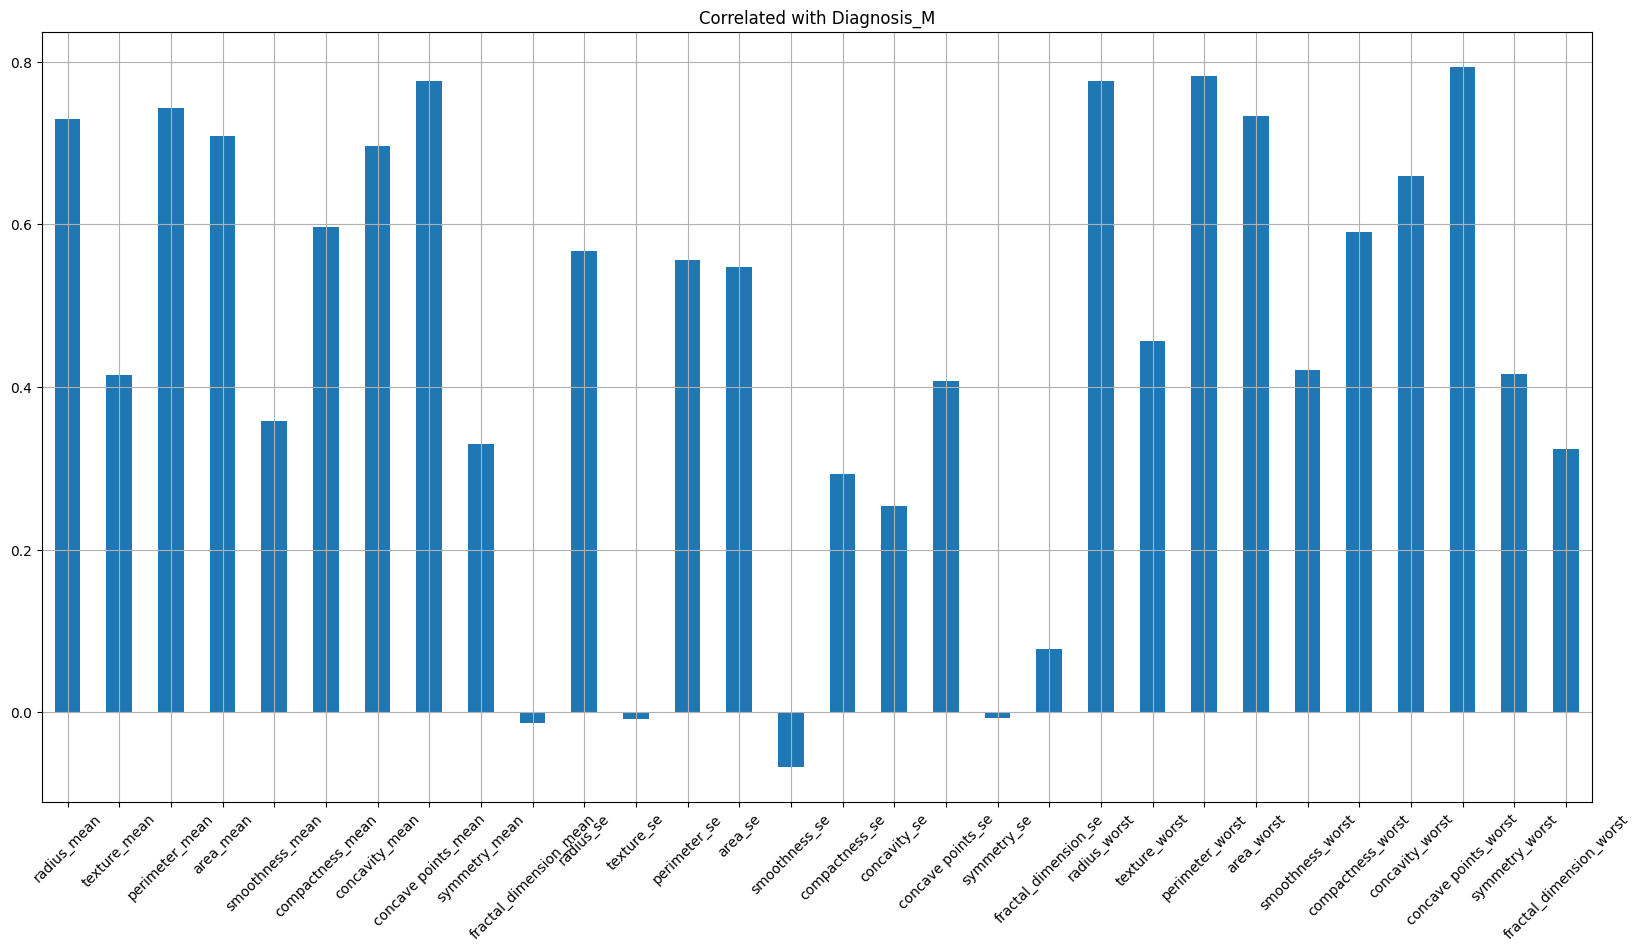

In [ ]:
#ici, pas besoin de mutual information, la corrélation suffit
num.corrwith(df['diagnosis']).plot.bar(
    figsize=(20,10), title='Correlated with Diagnosis_M',rot=45, grid=True
)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.1

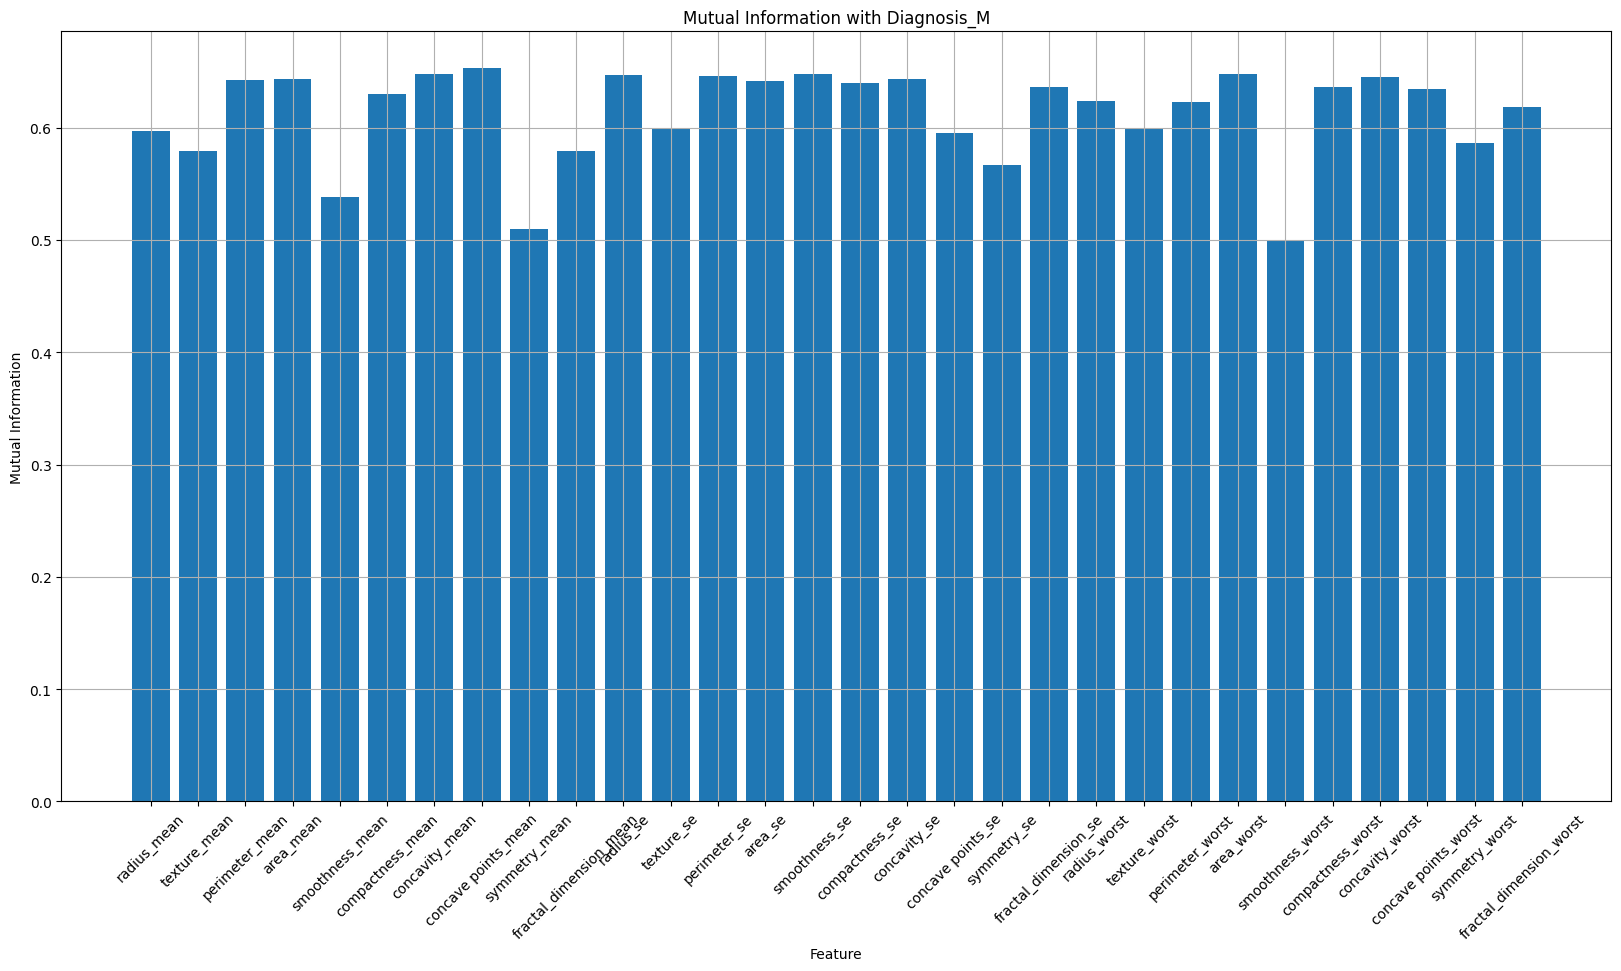

In [ ]:
mutual_infos = {}
for column in num.columns:
    mutual_info = mutual_info_score(df['diagnosis'], num[column])
    mutual_infos[column] = mutual_info


plt.figure(figsize=(20, 10))
plt.bar(mutual_infos.keys(), mutual_infos.values())
plt.title('Mutual Information with Diagnosis_M')
plt.xlabel('Feature')
plt.ylabel('Mutual Information')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<Axes: >

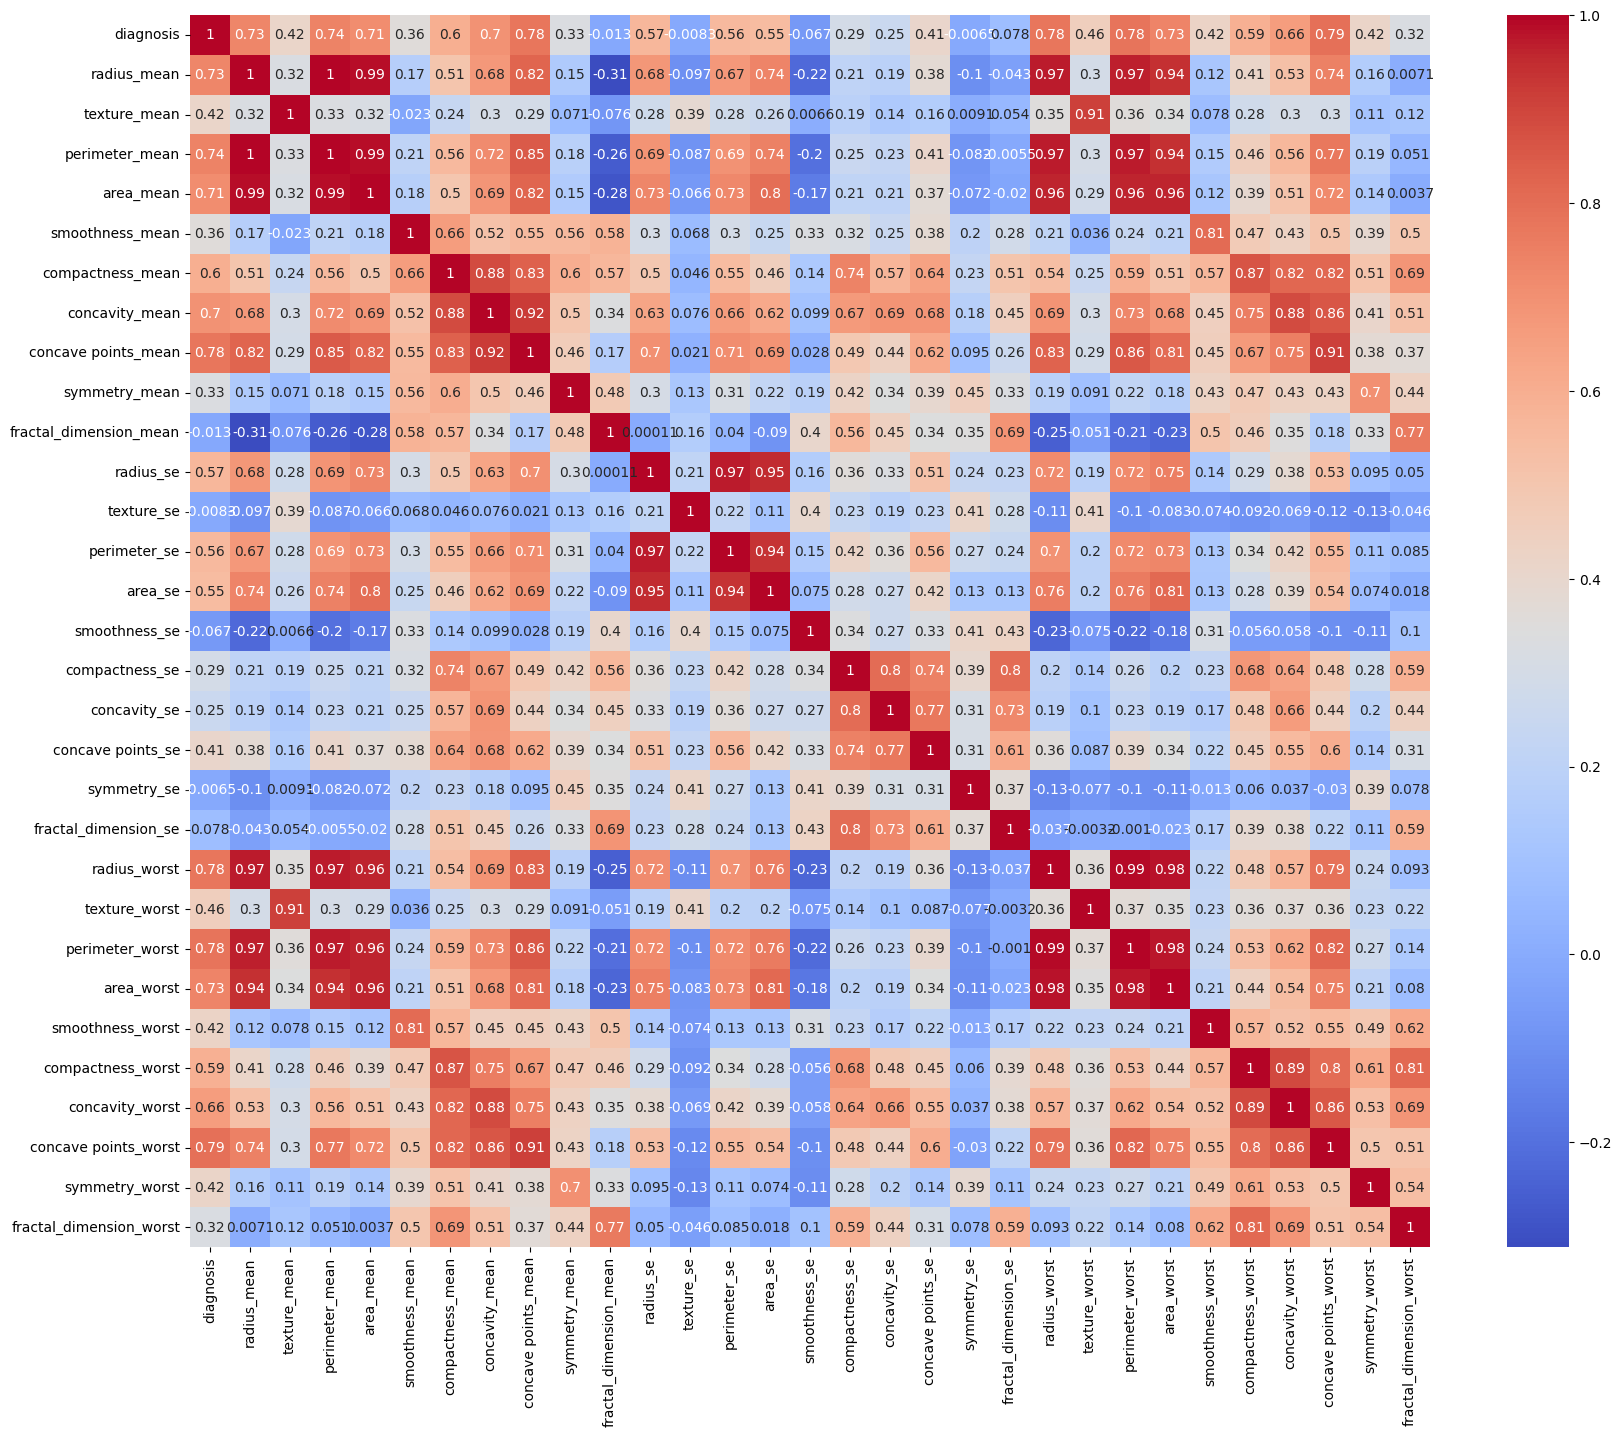

In [ ]:
#on trace la matrice de corrélation
corr=df.corr()

plt.figure(figsize=(20,16))
sn.heatmap(corr, annot=True, cmap='coolwarm')

Maintenant on va diviser le jeu de données

In [ ]:
X=df.drop('diagnosis', axis=1)
Y=df['diagnosis']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=0)

In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Entraînement

In [ ]:
lr=LogisticRegression(random_state=0)
lr.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred=lr.predict(X_train)
train_acc=accuracy_score(Y_train,y_pred)

train_acc

0.989010989010989

In [ ]:
y1_pred=lr.predict(X_test)
test_acc=accuracy_score(Y_test,y1_pred)

test_acc

0.9649122807017544

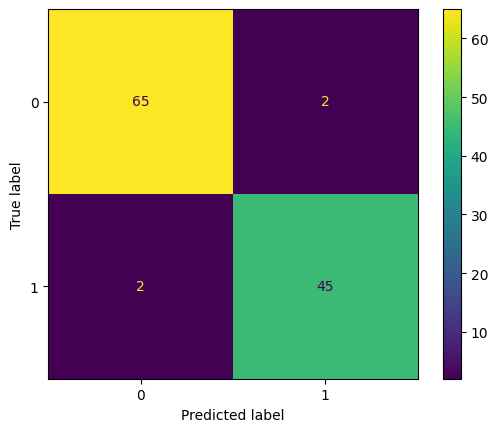

In [ ]:
conf =confusion_matrix(Y_test,y1_pred)
dis=ConfusionMatrixDisplay(conf)
dis.plot()

In [ ]:
f1=f1_score(Y_test, y1_pred)

f1

0.9574468085106385

In [ ]:
precision=precision_score(Y_test, y1_pred)

precision

0.9574468085106383

In [ ]:
recall=recall_score(Y_test, y1_pred)

recall

0.9574468085106383

In [ ]:
results=pd.DataFrame([['Logistic Regression', test_acc, f1, precision, recall]],
                    columns=['Model','Accuracy','F1-score','Precision','Recall'])

results

,Model,Accuracy,F1-score,Precision,Recall
0,Logistic Regression,0.964912,0.957447,0.957447,0.957447


In [ ]:
#testons la validation croisée
accuracies=cross_val_score(estimator=lr, X=X_train, y=Y_train, cv=10)
accuracies

array([0.97826087, 0.97826087, 0.97826087, 0.97826087, 0.95652174,
       0.93333333, 1.        , 1.        , 0.97777778, 1.        ])

In [ ]:
accuracies.mean()*100


97.80676328502416

In [ ]:
accuracies.std()*100

1.9770439179502723

Optimisation des hyperparamètres

In [ ]:
parameters={
    'penalty':['l1', 'l2', 'elasticnet', 'none'],
    'C':[0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0],
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
}

In [ ]:
random_search=RandomizedSearchCV(estimator=lr, param_distributions=parameters,n_iter=10, scoring='roc_auc', n_jobs=-1,
                                cv=10, verbose=3)

In [ ]:
random_search.fit(X_train,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

RandomizedSearchCV(cv=10, estimator=LogisticRegression(random_state=0),
                   n_jobs=-1,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5,
                                              1.75, 2.0],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg', 'sag',
                                                   'saga']},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.best_estimator_

LogisticRegression(penalty='l1', random_state=0, solver='saga')

In [ ]:
random_search.best_score_

0.9965010141987829

In [ ]:
random_search.best_params_

{'solver': 'saga', 'penalty': 'l1', 'C': 1.0}

In [ ]:
lr_final=LogisticRegression(solver='saga', penalty='none', C=0.75)
lr_final.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.75, penalty='none', solver='saga')

In [ ]:
y_pred=lr_final.predict(X_test)
y1_pred=lr_final.predict(X_train)

train_acc=accuracy_score(Y_train,y1_pred)
test_acc=accuracy_score(Y_test,y_pred)

f1=f1_score(Y_test,y_pred)
precision=precision_score(Y_test,y_pred)
recall=recall_score(Y_test,y_pred)

In [ ]:
results2=pd.DataFrame([['Logistic Regression Forest', train_acc,test_acc, f1, precision, recall]],
                    columns=['Model','Train Acc','Test Acc','F1-score','Precision','Recall'])




In [ ]:
results2

,Model,Train Acc,Test Acc,F1-score,Precision,Recall
0,Logistic Regression Forest,0.989011,0.964912,0.957447,0.957447,0.957447
